In [1]:
import autograd.numpy as np
#import numpy as np 
import pymanopt
from pymanopt.manifolds import Stiefel
from pymanopt import manifolds
from pymanopt.optimizers import ConjugateGradient, SteepestDescent
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
%%time
k,n = 3, 128
A_ = np.random.randn(n,n)
A = A_ + A_.T
N = np.diag(np.arange(k, 0, -1))

CPU times: user 844 µs, sys: 371 µs, total: 1.21 ms
Wall time: 595 µs


In [3]:
manifold = Stiefel(n, k)

@pymanopt.function.autograd(manifold)
def cost(U):
    return np.trace(U.T@A@U@N)

problem = pymanopt.Problem(manifold, cost)

In [4]:
optimizers = []
optimizers.append(pymanopt.optimizers.SteepestDescent(verbosity=1, log_verbosity=2))
optimizers.append(pymanopt.optimizers.ConjugateGradient(verbosity=1, log_verbosity=2))

In [5]:
results = []
for optimizer in optimizers:
    res = optimizer.run(problem)
    results.append(res)

Optimizing...
Terminated - max iterations reached after 0.69 seconds.

Optimizing...
Terminated - min step_size reached after 237 iterations, 0.19 seconds.



In [6]:
results[0].log.keys()

dict_keys(['optimizer', 'stopping_criteria', 'optimizer_parameters', 'iterations'])

In [7]:
results[0].log['iterations'].keys()

dict_keys(['time', 'iteration', 'point', 'cost', 'gradient_norm'])

In [15]:
plt.rcParams['text.usetex'] = True

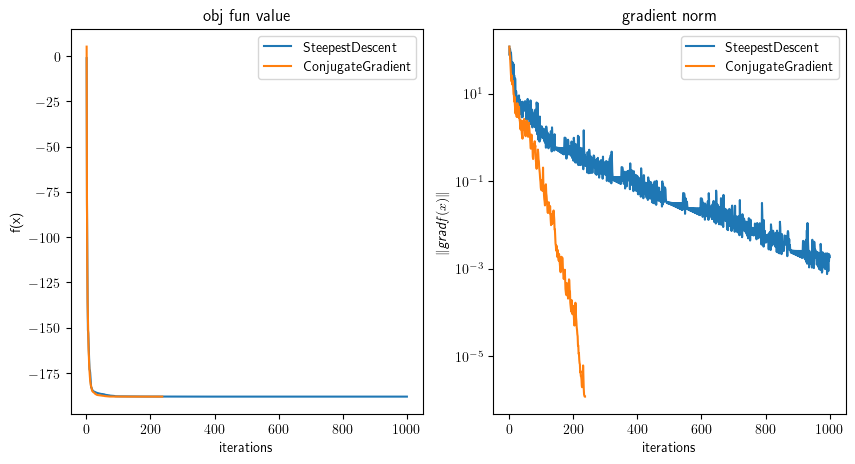

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('obj fun value')
ax2.set_title('gradient norm')
for res in results:
    opt_name = res.log['optimizer']
    iters = res.log['iterations']['iteration']
    cost = res.log['iterations']['cost']
    gnorm = res.log['iterations']['gradient_norm']
    ax1.plot(iters, cost, label=opt_name)
    ax2.plot(iters, gnorm, label=opt_name)

    # label
    ax1.set_xlabel('iterations')
    ax2.set_xlabel('iterations')
    ax1.set_ylabel('f(x)')
    ax2.set_ylabel(r'$\|\textit{grad} f(x)\|$')
    
    ax2.set_yscale('log')    
ax1.legend()    
ax2.legend()
plt.savefig('res.png')

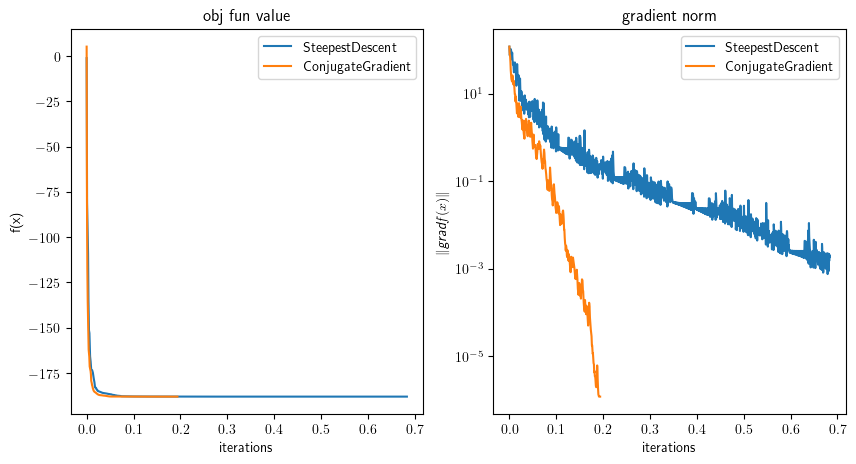

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('obj fun value')
ax2.set_title('gradient norm')
for res in results:
    opt_name = res.log['optimizer']
    ts = np.array(res.log['iterations']['time'])
    ts = ts - ts[0]
    cost = res.log['iterations']['cost']
    gnorm = res.log['iterations']['gradient_norm']
    ax1.plot(ts, cost, label=opt_name)
    ax2.plot(ts, gnorm, label=opt_name)
    
    # label
    ax1.set_xlabel('iterations')
    ax2.set_xlabel('iterations')
    ax1.set_ylabel('f(x)')
    ax2.set_ylabel(r'$\|\textit{grad} f(x)\|$')
    
    ax2.set_yscale('log')    
ax1.legend()    
ax2.legend()